<a href="https://colab.research.google.com/github/D-Franca-Almeida/TCC_Graphs/blob/main/TCC_COCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install json


ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


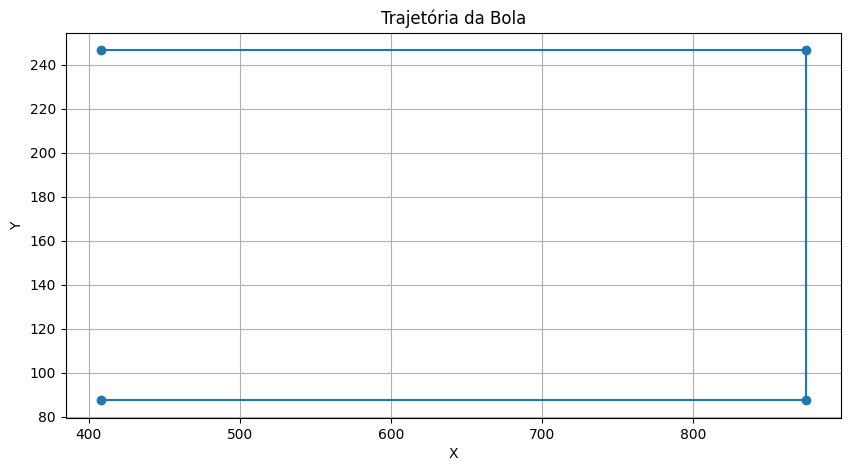

In [ ]:
import json
import matplotlib.pyplot as plt

# Carregar o arquivo JSON com as anotações COCO
with open('/content/instances_default.json', 'r') as f:
    coco_data = json.load(f)

# Escolher uma das anotações (você pode modificar para escolher uma específica)
annotation = coco_data['annotations'][0]

# Extrair as coordenadas da anotação
# Supondo que as coordenadas estão na chave 'bbox' (bounding box) ou 'segmentation'
if 'bbox' in annotation:
    x, y, width, height = annotation['bbox']
    coords = [(x, y), (x + width, y), (x + width, y + height), (x, y + height)]
elif 'segmentation' in annotation:
    # Se for uma segmentação poligonal, 'segmentation' é uma lista de listas
    coords = annotation['segmentation'][0]
    coords = [(coords[i], coords[i + 1]) for i in range(0, len(coords), 2)]

# Separar as coordenadas em listas de x e y para plotagem
x_coords = [coord[0] for coord in coords]
y_coords = [coord[1] for coord in coords]

# Criar o gráfico
plt.figure(figsize=(10, 5))
plt.plot(x_coords, y_coords, marker='o', linestyle='-')
plt.title('Trajetória da Bola')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


In [ ]:
import json
import matplotlib.pyplot as plt


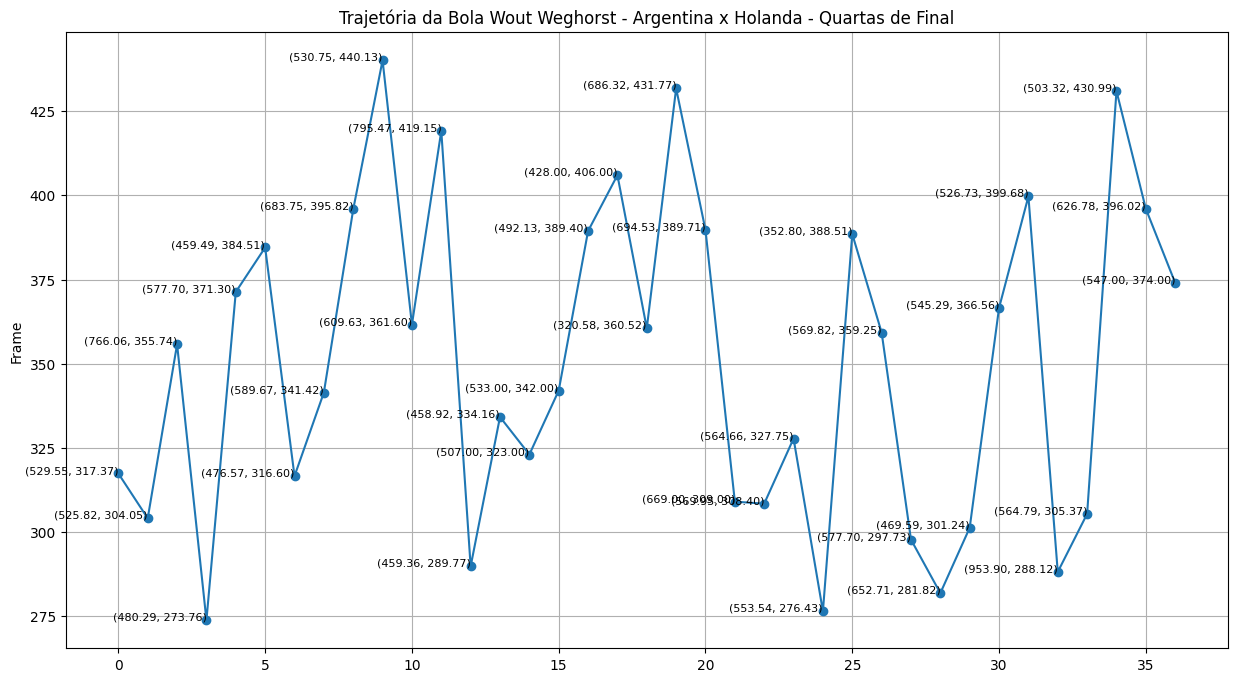

In [ ]:
with open('/content/instances_default.json') as f:
    annotations = json.load(f)

ball_annotations = [annotation for annotation in annotations['annotations'] if annotation['category_id'] == 6 ]
ball_coordinates = []
for annotation in ball_annotations:
    bbox = annotation['bbox']  # Ou 'segmentation'
    x = bbox[0]
    y = bbox[1]
    ball_coordinates.append((x, y))
    #print(f"'x: '+{x}+  ' ' + 'y: '+ {y}")


# Separar as coordenadas em listas de x e y
x_coords = [coord[0] for coord in ball_coordinates]
y_coords = [coord[1] for coord in ball_coordinates]
trajetoria = ball_coordinates
# Amostragem dos dados: selecionar a cada n-ésimo ponto
n = 50
trajetoria_amostrada = trajetoria[::n]

# Separar as coordenadas amostradas em listas de x e y
x_coords_amostradas = [coord[0] for coord in trajetoria_amostrada]
y_coords_amostradas = [coord[1] for coord in trajetoria_amostrada]

# Criar o gráfico
plt.figure(figsize=(15, 8))
plt.plot(range(len(trajetoria_amostrada)), y_coords_amostradas, marker='o', linestyle='-')

# Adicionar rótulos com as coordenadas em cada ponto
for i, (x, y) in enumerate(trajetoria_amostrada):
    plt.text(i, y, f'({x:.2f}, {y:.2f})', fontsize=8, ha='right')

plt.title('Trajetória da Bola Wout Weghorst - Argentina x Holanda - Quartas de Final')
plt.xlabel('')
plt.ylabel('Frame')
plt.grid(True)
plt.show()

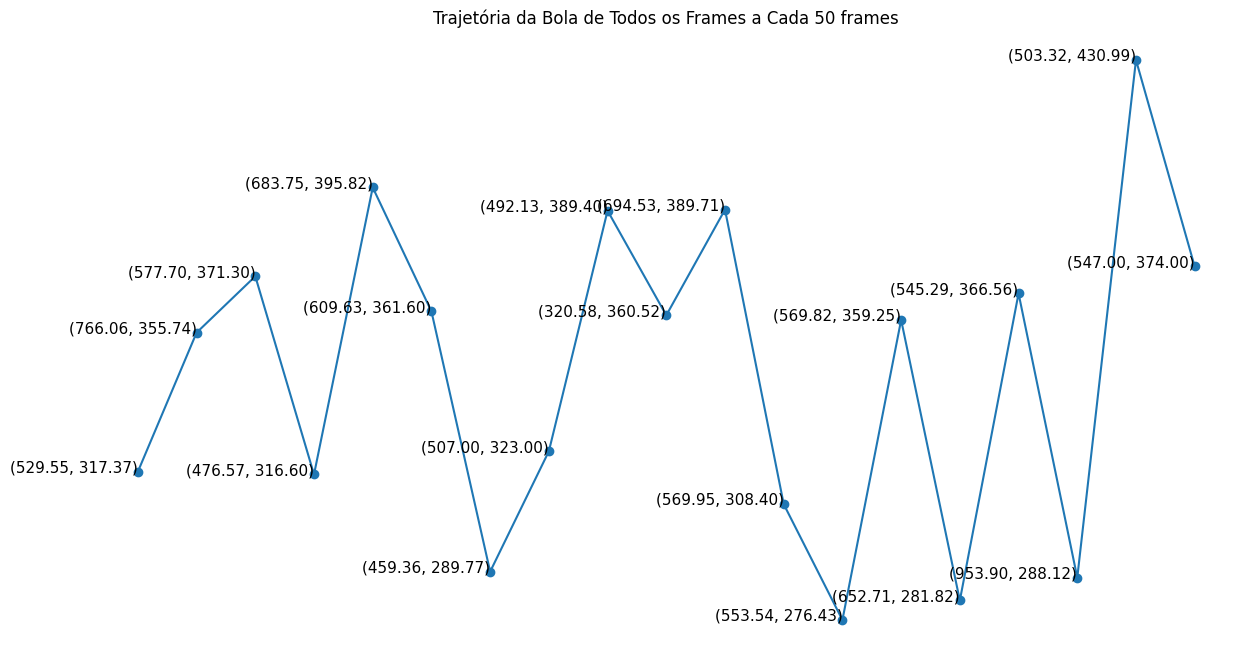

In [ ]:
import json
import matplotlib.pyplot as plt

with open('/content/instances_default.json') as f:
    annotations = json.load(f)

ball_annotations = [annotation for annotation in annotations['annotations'] if annotation['category_id'] == 6]
ball_coordinates = []
for annotation in ball_annotations:
    bbox = annotation['bbox']  # Ou 'segmentation'
    x = bbox[0]
    y = bbox[1]
    ball_coordinates.append((x, y))

# Amostragem dos dados: selecionar a cada n-ésimo ponto
n = 100
trajetoria_amostrada = ball_coordinates[::n]

# Criar o gráfico
plt.figure(figsize=(15, 8))
plt.plot(range(len(trajetoria_amostrada)), [coord[1] for coord in trajetoria_amostrada], marker='o', linestyle='-')

# Adicionar rótulos com as coordenadas em cada ponto
for i, (x, y) in enumerate(trajetoria_amostrada):
    plt.text(i, y, f'({x:.2f}, {y:.2f})', fontsize=11, ha='right')

plt.title('Trajetória da Bola de Todos os Frames a Cada 50 frames')
plt.xlabel('Frame')
plt.ylabel('Posição Vertical (Y)')
plt.grid(True)
plt.axis('off')  # Desativar os eixos
plt.show()


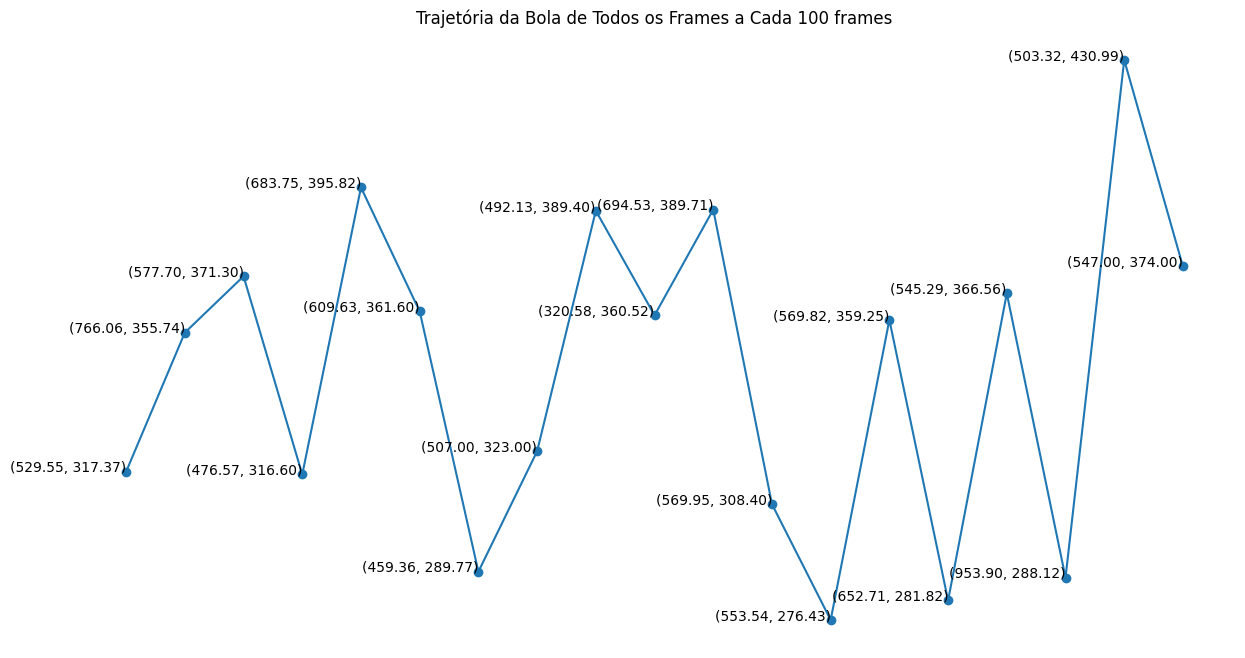

In [ ]:
import json
import matplotlib.pyplot as plt

with open('/content/instances_default.json') as f:
    annotations = json.load(f)

ball_annotations = [annotation for annotation in annotations['annotations'] if annotation['category_id'] == 6]
ball_coordinates = []
for annotation in ball_annotations:
    bbox = annotation['bbox']  # Ou 'segmentation'
    x = bbox[0]
    y = bbox[1]
    ball_coordinates.append((x, y))

# Amostragem dos dados: selecionar a cada n-ésimo ponto
n = 100
trajetoria_amostrada = ball_coordinates[::n]

# Criar o gráfico
plt.figure(figsize=(15, 8))
plt.plot(range(len(trajetoria_amostrada)), [coord[1] for coord in trajetoria_amostrada], marker='o', linestyle='-')

# Adicionar rótulos com as coordenadas em cada ponto
for i, (x, y) in enumerate(trajetoria_amostrada):
    plt.text(i, y, f'({x:.2f}, {y:.2f})', fontsize=10, ha='right')

plt.title('Trajetória da Bola de Todos os Frames a Cada 100 frames')
plt.xlabel('Frame')
plt.ylabel('Posição Vertical (Y)')
plt.grid(True)
plt.axis('off')  # Desativar os eixos
plt.show()

In [ ]:
import json
import pandas as pd
import re

# Função para extrair o número do quadro do nome do arquivo
def extract_frame_number(file_name):
    match = re.search(r'frame_(\d+)', file_name)
    return int(match.group(1)) if match else None

# Carregar o arquivo JSON
with open('instances_default.json') as f:
    data = json.load(f)

# Mapear IDs de imagens para nomes de arquivos
image_id_to_filename = {image['id']: image['file_name'] for image in data['images']}

# Filtrar as anotações da categoria "Bola"
ball_annotations = [annotation for annotation in data['annotations'] if annotation['category_id'] == 6]

# Coletar coordenadas e números de quadros
ball_coordinates = []
for annotation in ball_annotations:
    image_id = annotation['image_id']
    file_name = image_id_to_filename.get(image_id)
    if file_name is not None:
        frame_number = extract_frame_number(file_name)
        bbox = annotation['bbox']
        x = bbox[0]
        y = bbox[1]
        ball_coordinates.append((x, y, frame_number))

# Amostragem dos dados: selecionar a cada n-ésimo ponto
n = 100
trajetoria_amostrada = ball_coordinates[::n]

# Criar DataFrame
df = pd.DataFrame(trajetoria_amostrada, columns=['Largura da Imagem', 'Altura da Imagem', 'Número do Quadro'])

# Supondo uma taxa de quadros (frames por segundo)
fps = 60

# Adicionar coluna de tempo em segundos
df['Tempo (s)'] = df['Número do Quadro'] / fps

# Salvar o DataFrame em um arquivo Excel
df.to_excel('trajetoria_bola.xlsx', index=False)

# Exibir a tabela
print(df)


    Largura da Imagem  Altura da Imagem  Número do Quadro  Tempo (s)
0              529.55            317.37                 0   0.000000
1              766.06            355.74               100   1.666667
2              577.70            371.30               200   3.333333
3              476.57            316.60               300   5.000000
4              683.75            395.82               400   6.666667
5              609.63            361.60               500   8.333333
6              459.36            289.77               600  10.000000
7              507.00            323.00               700  11.666667
8              492.13            389.40               800  13.333333
9              320.58            360.52               900  15.000000
10             694.53            389.71              1000  16.666667
11             569.95            308.40              1100  18.333333
12             553.54            276.43              1200  20.000000
13             569.82            3

In [ ]:
pip install pandas openpyxl


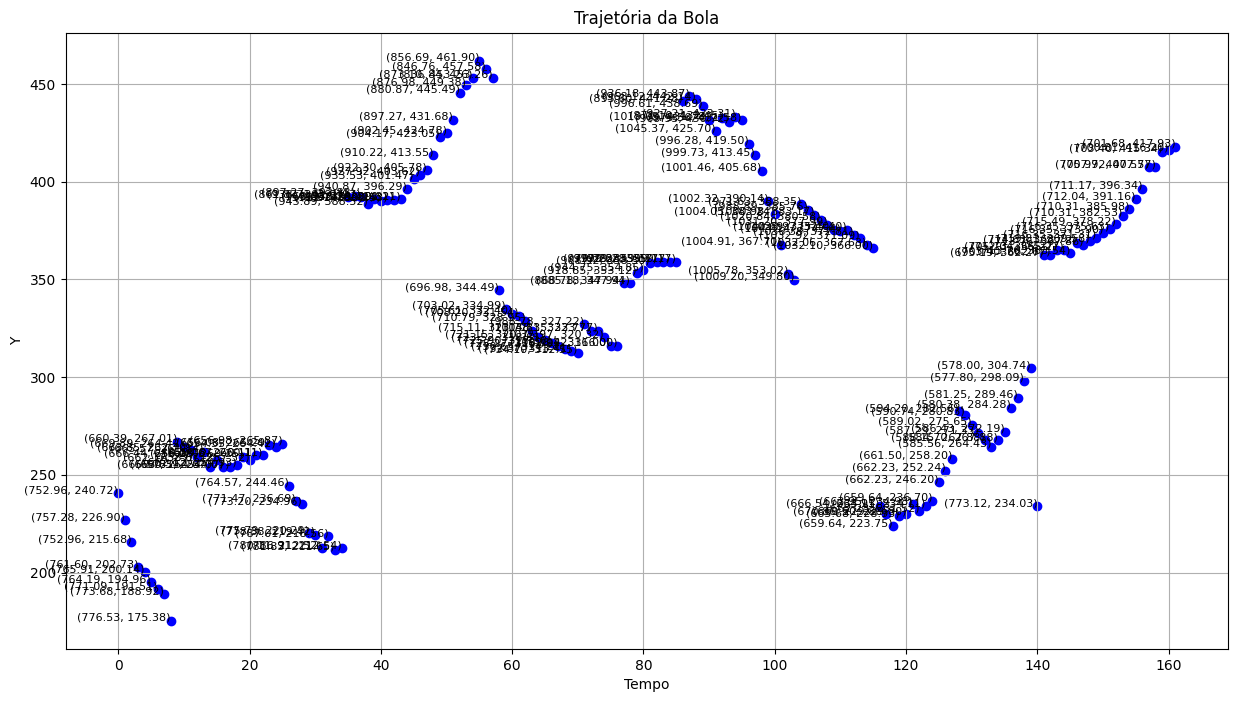

In [ ]:
import json
import os
import matplotlib.pyplot as plt

# Caminho para o arquivo COCO
coco_file_path = '/content/instances_default.json'

# Abre o arquivo COCO
with open(coco_file_path) as f:
    annotations = json.load(f)

# Dicionário para mapear ID de categoria para o nome da categoria
category_names = {category['id']: category['name'] for category in annotations['categories']}

# Filtra as anotações da bola
ball_annotations = [annotation for annotation in annotations['annotations'] if annotation['category_id'] == 4]

# Lista para armazenar as coordenadas da bola
ball_coordinates = []

# Itera sobre as anotações da bola e extrai as coordenadas
for annotation in ball_annotations:
    image_id = annotation['image_id']
    image_info = [info for info in annotations['images'] if info['id'] == image_id][0]
    file_name = image_info['file_name']
    image_name = os.path.join('/content/images', file_name)  # Ajuste o caminho conforme necessário
    bbox = annotation['bbox']
    x = bbox[0]
    y = bbox[1]
    ball_coordinates.append((image_name, x, y))

# Criação do gráfico
plt.figure(figsize=(15, 8))

# Adiciona cada ponto da trajetória com rótulos
for i, (image_name, x, y) in enumerate(ball_coordinates):
    plt.scatter(i, y, color='blue')
    plt.text(i, y, f'({x:.2f}, {y:.2f})', fontsize=8, ha='right')

plt.title('Trajetória da Bola')
plt.xlabel('Tempo')
plt.ylabel('Y')
plt.grid(True)
plt.show()


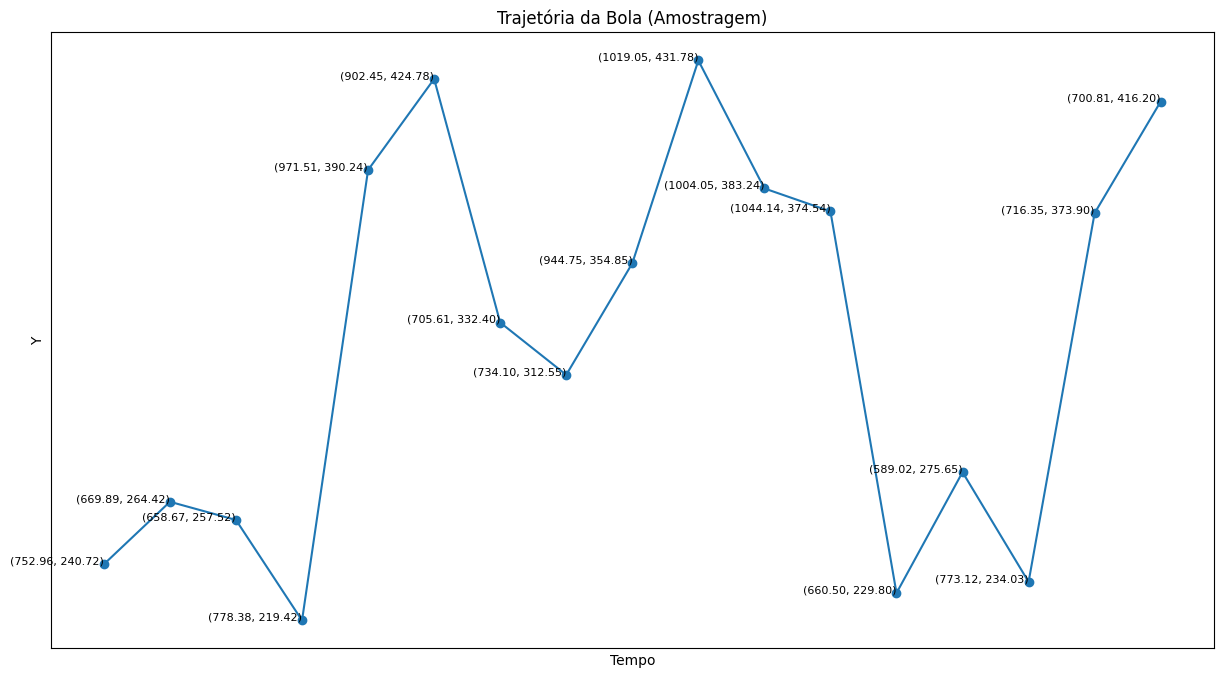

In [ ]:
# Amostragem dos dados: selecionar a cada n-ésimo ponto
n = 10
trajetoria_amostrada = trajetoria[::n]

# Separar as coordenadas amostradas em listas de x e y
x_coords_amostradas = [coord[0] for coord in trajetoria_amostrada]
y_coords_amostradas = [coord[1] for coord in trajetoria_amostrada]

# Criar o gráfico
plt.figure(figsize=(15, 8))
plt.plot(range(len(trajetoria_amostrada)), y_coords_amostradas, marker='o', linestyle='-')

# Adicionar rótulos com as coordenadas em cada ponto
for i, (x, y) in enumerate(trajetoria_amostrada):
    plt.text(i, y, f'({x:.2f}, {y:.2f})', fontsize=8, ha='right')

# Remover valores dos eixos x e y
plt.xticks([])
plt.yticks([])

plt.title('Trajetória da Bola (Amostragem)')
plt.xlabel('Tempo')
plt.ylabel('Y')
plt.grid(True)
plt.show()

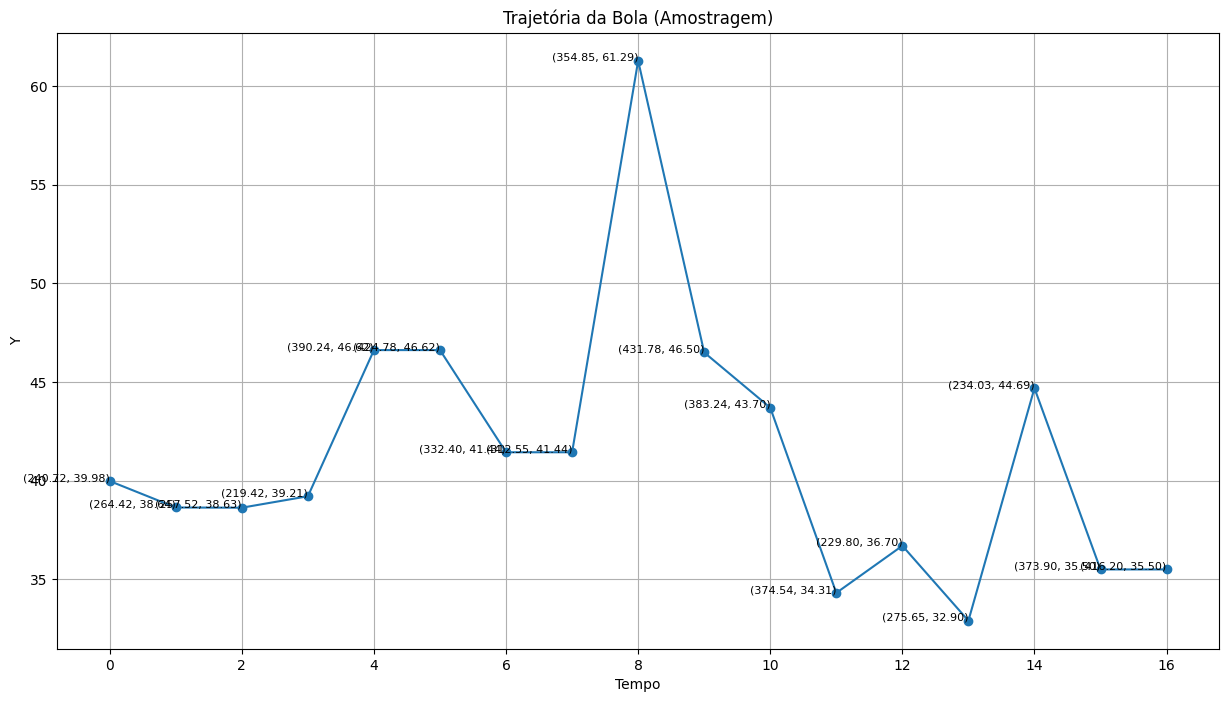

In [ ]:
with open('/content/instances_default.json') as f:
    annotations = json.load(f)

ball_annotations = [annotation for annotation in annotations['annotations'] if annotation['category_id'] == 4 ]
ball_coordinates = []
for annotation in ball_annotations:
    bbox = annotation['bbox']  # Ou 'segmentation'
    x = bbox[1]
    y = bbox[2]
    ball_coordinates.append((x, y))

# Separar as coordenadas em listas de x e y
x_coords = [coord[0] for coord in ball_coordinates]
y_coords = [coord[1] for coord in ball_coordinates]
trajetoria = ball_coordinates
# Amostragem dos dados: selecionar a cada n-ésimo ponto
n = 10
trajetoria_amostrada = trajetoria[::n]

# Separar as coordenadas amostradas em listas de x e y
x_coords_amostradas = [coord[0] for coord in trajetoria_amostrada]
y_coords_amostradas = [coord[1] for coord in trajetoria_amostrada]

# Criar o gráfico
plt.figure(figsize=(15, 8))
plt.plot(range(len(trajetoria_amostrada)), y_coords_amostradas, marker='o', linestyle='-')

# Adicionar rótulos com as coordenadas em cada ponto
for i, (x, y) in enumerate(trajetoria_amostrada):
    plt.text(i, y, f'({x:.2f}, {y:.2f})', fontsize=8, ha='right')

plt.title('Trajetória da Bola (Amostragem)')
plt.xlabel('Tempo')
plt.ylabel('Y')
plt.grid(True)
plt.show()

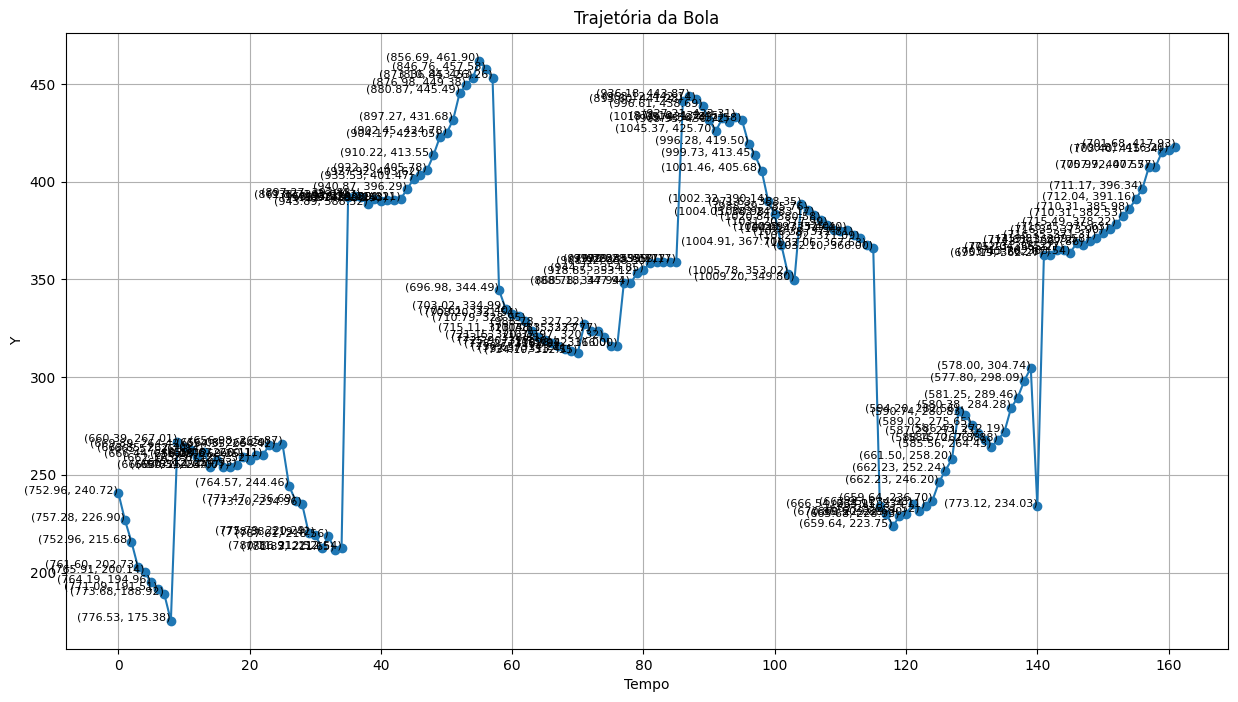

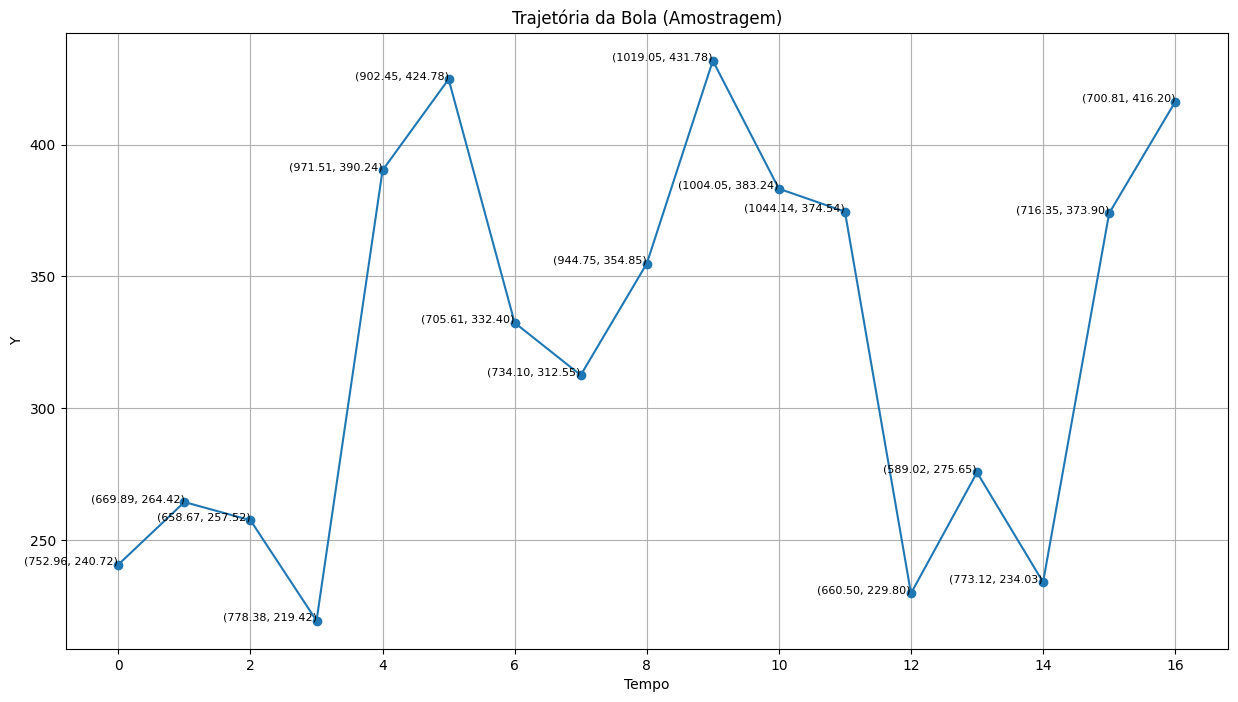

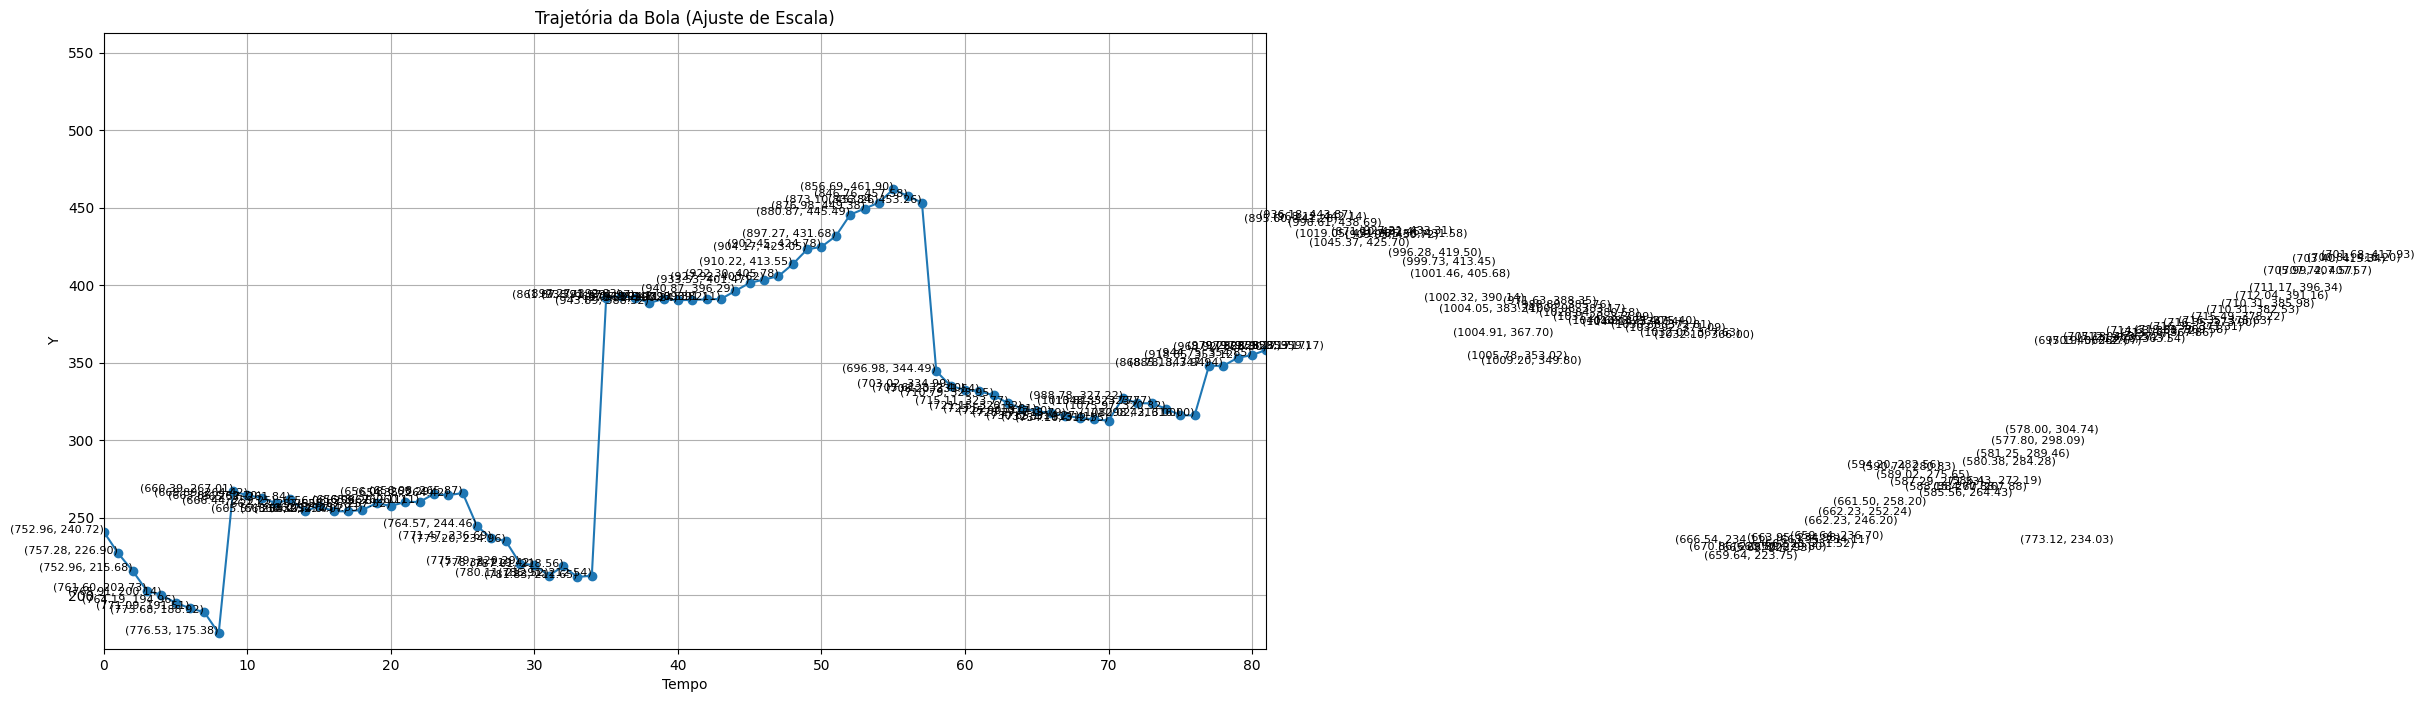

In [ ]:
# Criar o gráfico com ajuste de escala
plt.figure(figsize=(15, 8))
plt.plot(range(len(trajetoria)), y_coords, marker='o', linestyle='-')

# Ajustar a escala dos eixos para melhor visualização
plt.ylim(min(y_coords) - 10, max(y_coords) + 101)
plt.xlim(0, (len(trajetoria)/2))

# Adicionar rótulos com as coordenadas em cada ponto
for i, (x, y) in enumerate(trajetoria):
    plt.text(i, y, f'({x:.2f}, {y:.2f})', fontsize=8, ha='right')

plt.title('Trajetória da Bola (Ajuste de Escala)')
plt.xlabel('Tempo')
plt.ylabel('Y')
plt.grid(True)
plt.show()


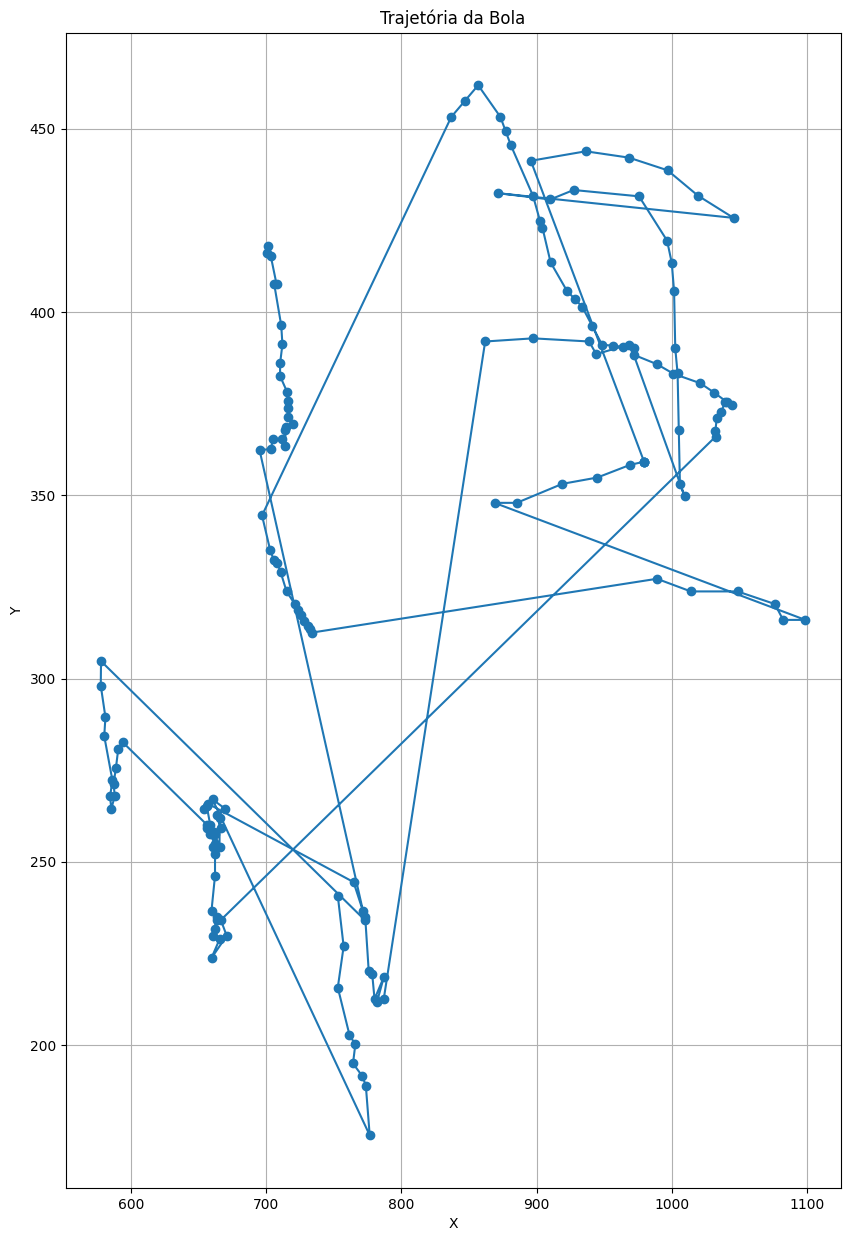

In [ ]:
# Criar o gráfico
plt.figure(figsize=(10, 15))
plt.plot(x_coordinates, y_coordinates, marker='o', linestyle='-')
plt.title('Trajetória da Bola')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

RESULTADOS DO TREINAMENTO CSV

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do CSV
df = pd.read_csv('/content/results.csv')
df.describe()


,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,1.096363,0.601588,0.982272,0.802543,0.652350,0.687345,0.428643,1.001787,0.538623,0.960646,0.000463,0.000463,0.000463
std,29.011492,0.275367,0.414988,0.119275,0.106713,0.139318,0.157338,0.114037,0.273239,0.371113,0.131581,0.000254,0.000254,0.000254
min,1.000000,0.797440,0.393130,0.889390,0.025450,0.136950,0.049180,0.011630,0.757570,0.369710,0.872710,0.000027,0.000027,0.000027
25%,25.750000,0.927505,0.454782,0.917400,0.745785,0.564480,0.597553,0.355868,0.822550,0.399390,0.888920,0.000250,0.000250,0.000250
50%,50.500000,1.027600,0.517125,0.951065,0.828865,0.705595,0.744375,0.457820,0.932745,0.455470,0.927480,0.000464,0.000464,0.000464
75%,75.250000,1.193200,0.617040,1.006175,0.872740,0.761458,0.812158,0.522088,1.101050,0.552875,0.993300,0.000677,0.000677,0.000677
max,100.000000,2.934000,4.345300,1.910500,0.918400,0.798240,0.844640,0.562870,2.809600,3.850100,2.016400,0.000888,0.000888,0.000888


                     epoch           train/box_loss           train/cls_loss  \
0                        1                   2.9340                  4.34530   
1                        2                   1.8070                  1.52990   
2                        3                   1.6343                  1.15700   
3                        4                   1.5903                  1.02840   
4                        5                   1.5236                  0.94485   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                   1.9105                  0.02545                  0.13695   
1                   1.2797                  0.68735                  0.28909   
2                   1.1834                  0.67291                  0.32347   
3                   1.1616                  0.84646                  0.36676   
4                   1.1360                  0.85396                  0.38619   

          metrics/mAP50(B)      metric

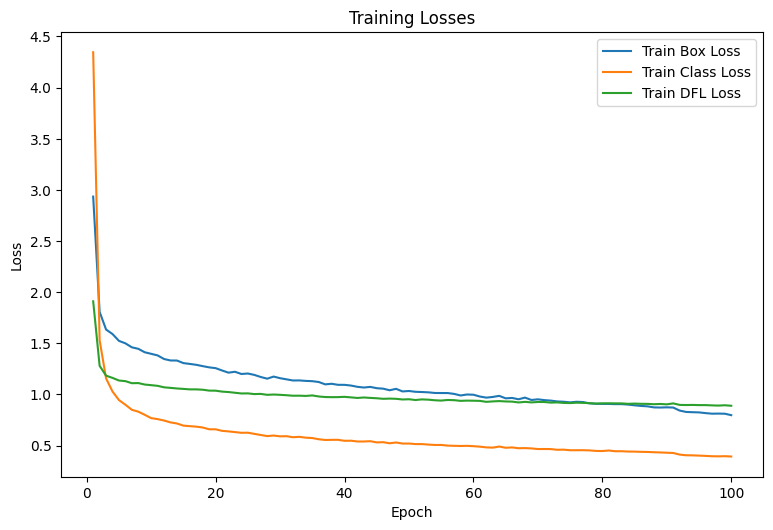

In [ ]:
# Verificar o cabeçalho do DataFrame
print(df.head())

# Configurar o tamanho das figuras
plt.figure(figsize=(15, 10))

# Plotar as perdas de treinamento
plt.subplot(2, 2, 1)
plt.plot(df.iloc[:, 0], df.iloc[:, 1], label='Train Box Loss')  # epoch vs train/box_loss
plt.plot(df.iloc[:, 0], df.iloc[:, 2], label='Train Class Loss')  # epoch vs train/cls_loss
plt.plot(df.iloc[:, 0], df.iloc[:, 3], label='Train DFL Loss')  # epoch vs train/dfl_loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses')
plt.legend()


plt.tight_layout()
plt.show()

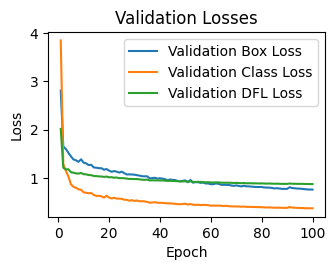

In [ ]:
# Plotar as perdas de validação
plt.subplot(2, 2, 2)
plt.plot(df.iloc[:, 0], df.iloc[:, 8], label='Validation Box Loss')  # epoch vs val/box_loss
plt.plot(df.iloc[:, 0], df.iloc[:, 9], label='Validation Class Loss')  # epoch vs val/cls_loss
plt.plot(df.iloc[:, 0], df.iloc[:, 10], label='Validation DFL Loss')  # epoch vs val/dfl_loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Losses')
plt.legend()

plt.tight_layout()
plt.show()

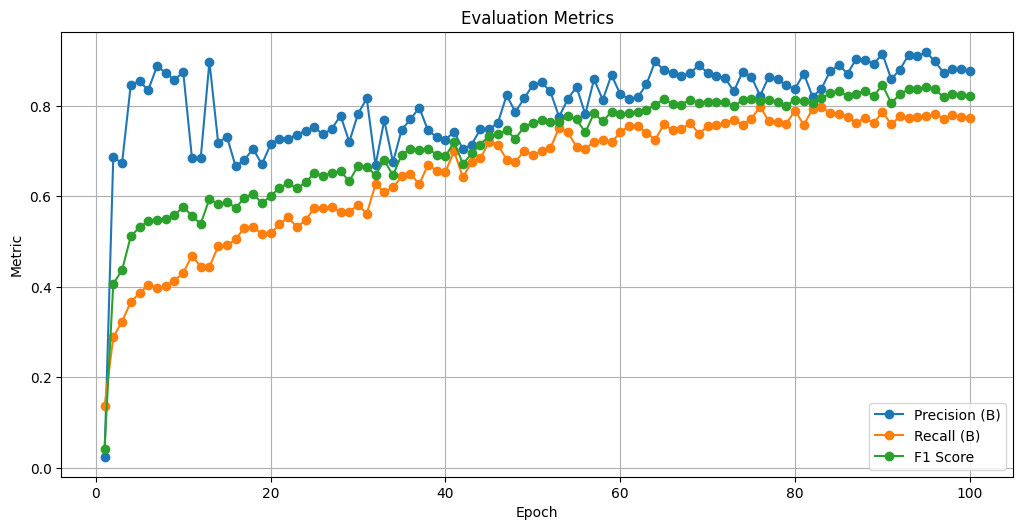

In [ ]:
# Verificar o cabeçalho do DataFrame
df.head()
# Calcular a métrica F1
precision = df.iloc[:, 4]
recall = df.iloc[:, 5]
f1_score = 2 * (precision * recall) / (precision + recall)

# Configurar o tamanho das figuras
plt.figure(figsize=(20, 10))

# Plotar métricas de precisão, recall e F1
plt.subplot(2, 2, 2)
plt.plot(df.iloc[:, 0], precision, label='Precision (B)', marker='o')  # epoch vs metrics/precision(B)
plt.plot(df.iloc[:, 0], recall, label='Recall (B)', marker='o')  # epoch vs metrics/recall(B)
plt.plot(df.iloc[:, 0], f1_score, label='F1 Score', marker='o')  # epoch vs calculated F1 Score
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Evaluation Metrics')
plt.legend()
plt.grid(True)

# Ajustar o layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()

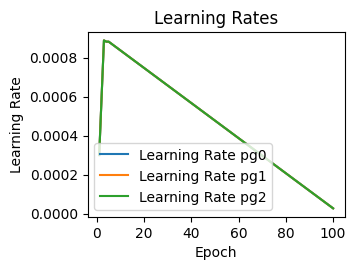

In [ ]:
# Plotar taxas de aprendizado
plt.subplot(2, 2, 4)
plt.plot(df.iloc[:, 0], df.iloc[:, 11], label='Learning Rate pg0')  # epoch vs lr/pg0
plt.plot(df.iloc[:, 0], df.iloc[:, 12], label='Learning Rate pg1')  # epoch vs lr/pg1
plt.plot(df.iloc[:, 0], df.iloc[:, 13], label='Learning Rate pg2')  # epoch vs lr/pg2
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rates')
plt.legend()

plt.tight_layout()
plt.show()

                     epoch           train/box_loss           train/cls_loss  \
0                        1                   2.9340                  4.34530   
1                        2                   1.8070                  1.52990   
2                        3                   1.6343                  1.15700   
3                        4                   1.5903                  1.02840   
4                        5                   1.5236                  0.94485   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                   1.9105                  0.02545                  0.13695   
1                   1.2797                  0.68735                  0.28909   
2                   1.1834                  0.67291                  0.32347   
3                   1.1616                  0.84646                  0.36676   
4                   1.1360                  0.85396                  0.38619   

          metrics/mAP50(B)      metric

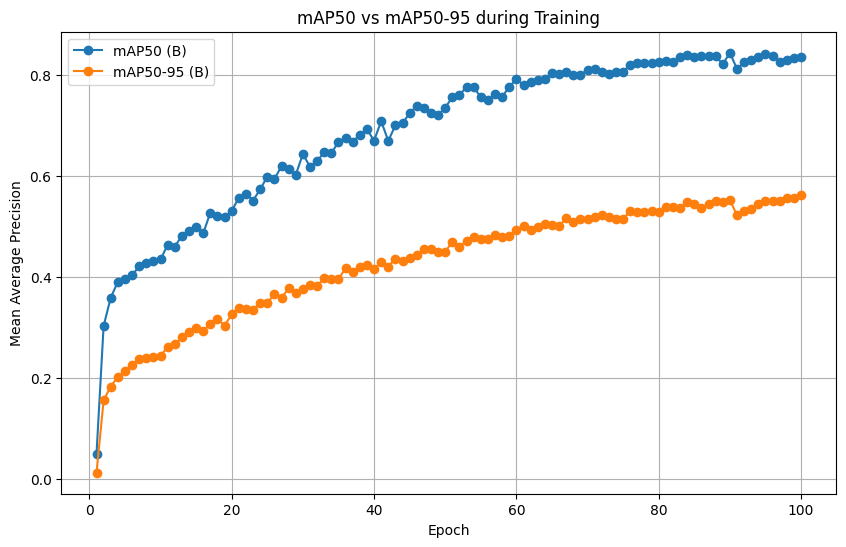

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do CSV
df = pd.read_csv('/content/results.csv')

# Verificar o cabeçalho do DataFrame
print(df.head())

# Configurar o tamanho das figuras
plt.figure(figsize=(10, 6))

# Plotar mAP50 e mAP50-95
plt.plot(df.iloc[:, 0], df.iloc[:, 6], label='mAP50 (B)', marker='o')  # epoch vs metrics/mAP50(B)
plt.plot(df.iloc[:, 0], df.iloc[:, 7], label='mAP50-95 (B)', marker='o')  # epoch vs metrics/mAP50-95(B)

plt.xlabel('Epoch')
plt.ylabel('Mean Average Precision')
plt.title('mAP50 vs mAP50-95 during Training')
plt.legend()
plt.grid(True)
plt.show()
